In [1]:
# libraries
import numpy as np
from tensorflow import keras
from sklearn import preprocessing
import seaborn as sns
import pandas as pd

In [2]:
# loading data
# split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Scale images to the [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0
# Make sure images have shape (784)
x_train = x_train.reshape(60000,-1)
x_test = x_test.reshape(10000,-1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [4]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
import xgboost as xg

In [ ]:
# default without tuning 

from sklearn.metrics import accuracy_score
import joblib
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

xg_model0 = xg.XGBClassifier(objective='multi:softmax', num_class=10, eval_metric='mlogloss', random_state=42)
xg_model0.fit(x_train, y_train_labels)


y_pred0 = xg_model0.predict(x_test)
accuracy0 = accuracy_score(y_test_labels, y_pred0)
print(f"Accuracy: {accuracy0:.4f}")
joblib.dump(xg_model0, "xgb_model.pkl")


Accuracy: 0.9795


['xgb_model.pkl']

In [12]:
# evaluation 
from sklearn.metrics import precision_score , confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:


y_test_labels = np.argmax(y_test, axis=1)  
precision = precision_score(y_test_labels, y_pred0, average='weighted')
print(f"precision score is {precision:.2f}")


precision score is 0.98


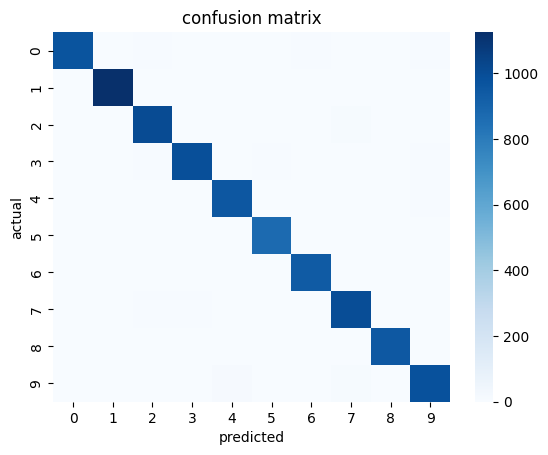

In [17]:
import numpy as np

y_test0 = np.argmax(y_test, axis=1)



confusionMatrix=confusion_matrix(y_pred0,y_test0)
sns.heatmap(confusionMatrix,cmap='Blues')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [19]:
classR=classification_report(y_pred0,y_test_labels)
print(classR)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       993
           1       0.99      0.99      0.99      1136
           2       0.98      0.98      0.98      1033
           3       0.98      0.98      0.98      1014
           4       0.98      0.98      0.98       973
           5       0.98      0.98      0.98       886
           6       0.98      0.98      0.98       955
           7       0.97      0.98      0.98      1022
           8       0.98      0.98      0.98       972
           9       0.97      0.97      0.97      1016

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

